# Sea Surface Temperature

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

np.warnings.filterwarnings('ignore') # for ignoring the warnings

In [2]:
ds_sst=xr.open_dataset('sst_java_sea.nc', chunks={'time':1})
ds_sst

<xarray.Dataset>
Dimensions:  (time: 168, lat: 40, lon: 64)
Coordinates:
  * time     (time) datetime64[ns] 2003-01-31 2003-02-28 ... 2016-12-31
  * lat      (lat) float32 -8.875 -8.625 -8.375 -8.125 ... 0.375 0.625 0.875
  * lon      (lon) float32 101.1 101.4 101.6 101.9 ... 116.1 116.4 116.6 116.9
Data variables:
    sst      (time, lat, lon) float32 dask.array<chunksize=(1, 40, 64), meta=np.ndarray>

Data diatas merupakan data Sea Surface Temperature bulanan dari tahun 2003 hingga 2016
Adapun range wilayahnya dari Latitude -8.875 sampai 0.875 dan Longitude 101.125 sampai 116.875. Wilayah ini merupakan wilayah barat Indonesia.

# Exercise
1. Gunakan .sel() untuk mengambil data september 2010 pada dataset SST
2. Gunakan .sel() untuk slicing data juni 2012 hingga juni 2013. Rata-ratakan menggunakan .mean() dan plotkan

In [3]:
ds_sst.sel(time='2010-09-30')

<xarray.Dataset>
Dimensions:  (lat: 40, lon: 64)
Coordinates:
    time     datetime64[ns] 2010-09-30
  * lat      (lat) float32 -8.875 -8.625 -8.375 -8.125 ... 0.375 0.625 0.875
  * lon      (lon) float32 101.1 101.4 101.6 101.9 ... 116.1 116.4 116.6 116.9
Data variables:
    sst      (lat, lon) float32 dask.array<chunksize=(40, 64), meta=np.ndarray>

In [4]:
ds_sst_jun2012_2013 = ds_sst.sel(time=slice('2012-06', '2013-06'))
ds_sst_jun2012_2013

<xarray.Dataset>
Dimensions:  (time: 13, lat: 40, lon: 64)
Coordinates:
  * time     (time) datetime64[ns] 2012-06-30 2012-07-31 ... 2013-06-30
  * lat      (lat) float32 -8.875 -8.625 -8.375 -8.125 ... 0.375 0.625 0.875
  * lon      (lon) float32 101.1 101.4 101.6 101.9 ... 116.1 116.4 116.6 116.9
Data variables:
    sst      (time, lat, lon) float32 dask.array<chunksize=(1, 40, 64), meta=np.ndarray>

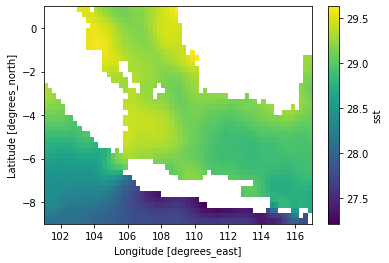

In [5]:
ds_sst_jun2012_2013_ave = ds_sst_jun2012_2013.mean(dim='time').sst.plot()

# Contoh : 
Kita akan focus di wilayah sumatera bagian timur, misal : 104-107 E dan 0 - 4 S

In [6]:
east_sumatra_sst=ds_sst.sel(lat=slice(-4, 0), lon=slice(104, 107)).sst
east_sumatra_sst

<xarray.DataArray 'sst' (time: 168, lat: 16, lon: 12)>
dask.array<getitem, shape=(168, 16, 12), dtype=float32, chunksize=(1, 16, 12), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2003-01-31 2003-02-28 ... 2016-12-31
  * lat      (lat) float32 -3.875 -3.625 -3.375 -3.125 ... -0.625 -0.375 -0.125
  * lon      (lon) float32 104.1 104.4 104.6 104.9 ... 106.1 106.4 106.6 106.9

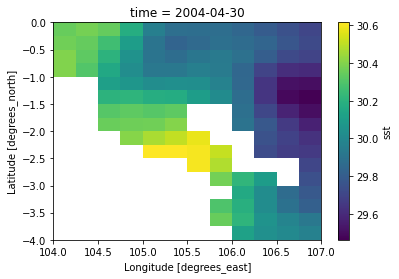

In [8]:
#sebagai contoh, mari kita lihat hasil slicing operasi diatas
east_sumatra_sst.isel(time=15).plot()

Dari visualisasi diatas, kita akan melihat nilai variabilitas sst di wilayah tersebut secara rata-rata. Sehingga kita harus merata-ratakan dimensi latitude dan longitudenya.

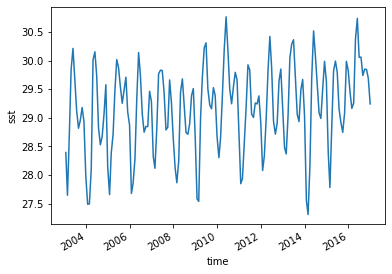

In [9]:
east_sumatra_sst.mean(['lat', 'lon']).plot()

Grafik diatas menunjukan kondisi sst di wilayah yang kita pilih (sumatera bagian timur) dari 2004 sampai 2016

# Excercise
Kalimantan selatan , dengan boundary 3 - 5 S, 110-116E
1. Cek wilayah yang di set, apakah sudah kalimantan selatan dengan menggunakan isel
2. Average  latitide dan longitudenya, dan plot SST variabel dari 2003-2016

In [12]:
south_kalimantan_sst=ds_sst.sel(lat=slice(-5, -3), lon=slice(110, 116)).sst
south_kalimantan_sst

<xarray.DataArray 'sst' (time: 168, lat: 8, lon: 24)>
dask.array<getitem, shape=(168, 8, 24), dtype=float32, chunksize=(1, 8, 24), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2003-01-31 2003-02-28 ... 2016-12-31
  * lat      (lat) float32 -4.875 -4.625 -4.375 -4.125 ... -3.625 -3.375 -3.125
  * lon      (lon) float32 110.1 110.4 110.6 110.9 ... 115.1 115.4 115.6 115.9

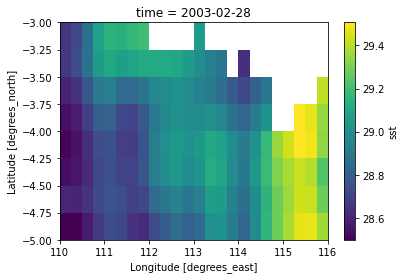

In [13]:
#Pertanyaan 1
south_kalimantan_sst.isel(time=1).plot()

In [14]:
#Pertanyaan 2

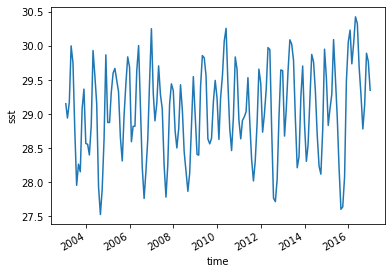

In [15]:
south_kalimantan_sst.mean(['lat', 'lon']).plot()

Text(0.5, 1.0, 'SST Variability in South of Kalimantan')

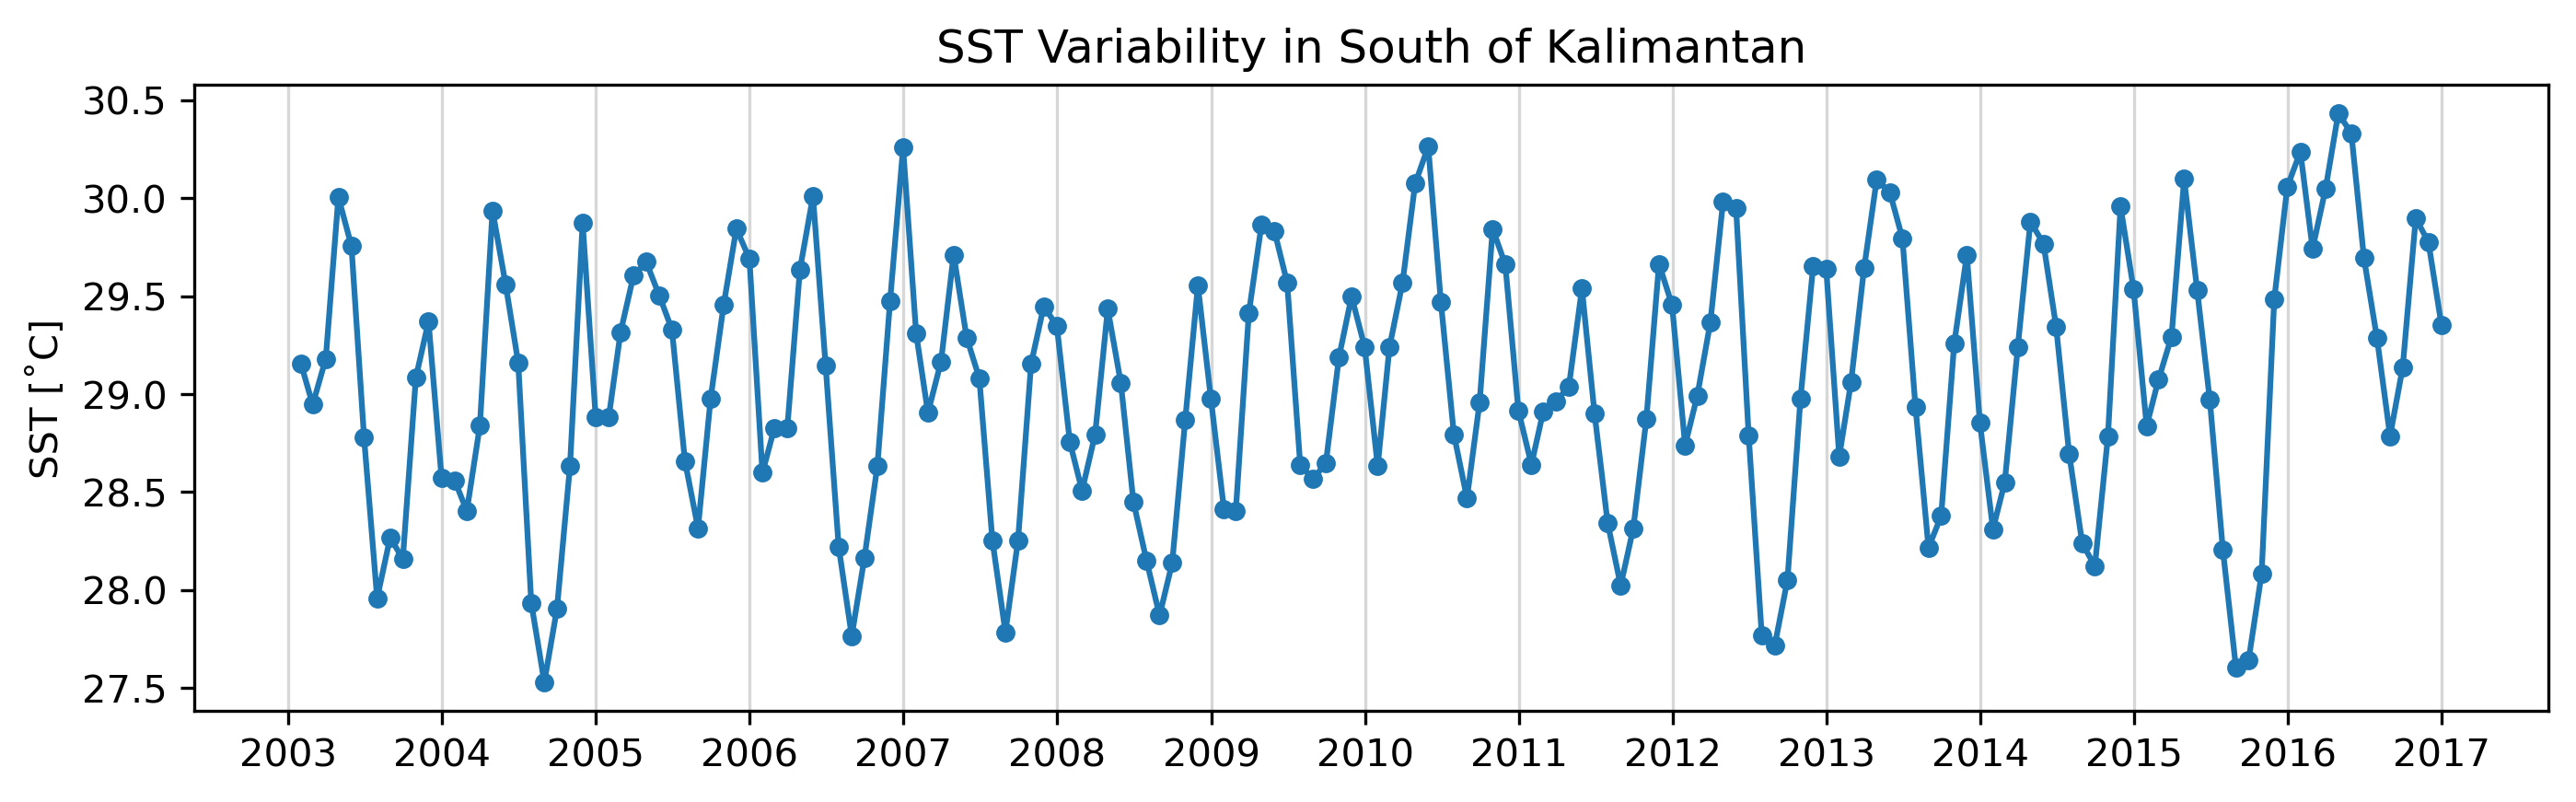

In [16]:
#Berikut plotting grafik yang digunakan untuk lampiran paper
fig, ax = plt.subplots(dpi=300, figsize=[11,3])

ax.plot(south_kalimantan_sst.time,
        south_kalimantan_sst.mean(['lat','lon']), 
        marker='o', markersize=4)

for_xticks = pd.date_range('2003','2017',freq='YS')
ax.set_xticks(for_xticks)
ax.set_xticklabels([str(i)[:4] for i in for_xticks])

ax.grid(axis='x', alpha=0.5)

ax.set_ylabel('SST [˚C]')
ax.set_title('SST Variability in South of Kalimantan')

# Groupby Data

In [17]:
monthly_clim_sst = ds_sst.groupby('time.month').mean().sst
season_sst = ds_sst.groupby('time.season').mean().sst

In [18]:
# Iklim bulanan
monthly_clim_sst

<xarray.DataArray 'sst' (month: 12, lat: 40, lon: 64)>
dask.array<concatenate, shape=(12, 40, 64), dtype=float32, chunksize=(1, 40, 64), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -8.875 -8.625 -8.375 -8.125 ... 0.375 0.625 0.875
  * lon      (lon) float32 101.1 101.4 101.6 101.9 ... 116.1 116.4 116.6 116.9
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [19]:
# Seasonal
season_sst

<xarray.DataArray 'sst' (season: 4, lat: 40, lon: 64)>
dask.array<concatenate, shape=(4, 40, 64), dtype=float32, chunksize=(1, 40, 64), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -8.875 -8.625 -8.375 -8.125 ... 0.375 0.625 0.875
  * lon      (lon) float32 101.1 101.4 101.6 101.9 ... 116.1 116.4 116.6 116.9
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

# Exercise
1. gunakan .sel() utk mengambil data July dari monthly_clim_sst dan plot.
1. gunakan .sel() utk mengambil data December-February dari season_sst dan plot.

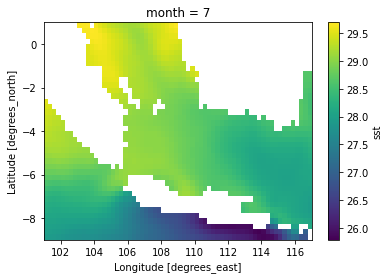

In [20]:
# Pertanyaan 1
monthly_clim_sst.sel(month=7).plot()

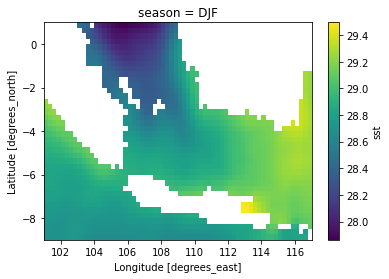

In [21]:
season_sst.sel(season='DJF').plot()

Text(0.5, 1.0, 'Dec-Feb Climatology')

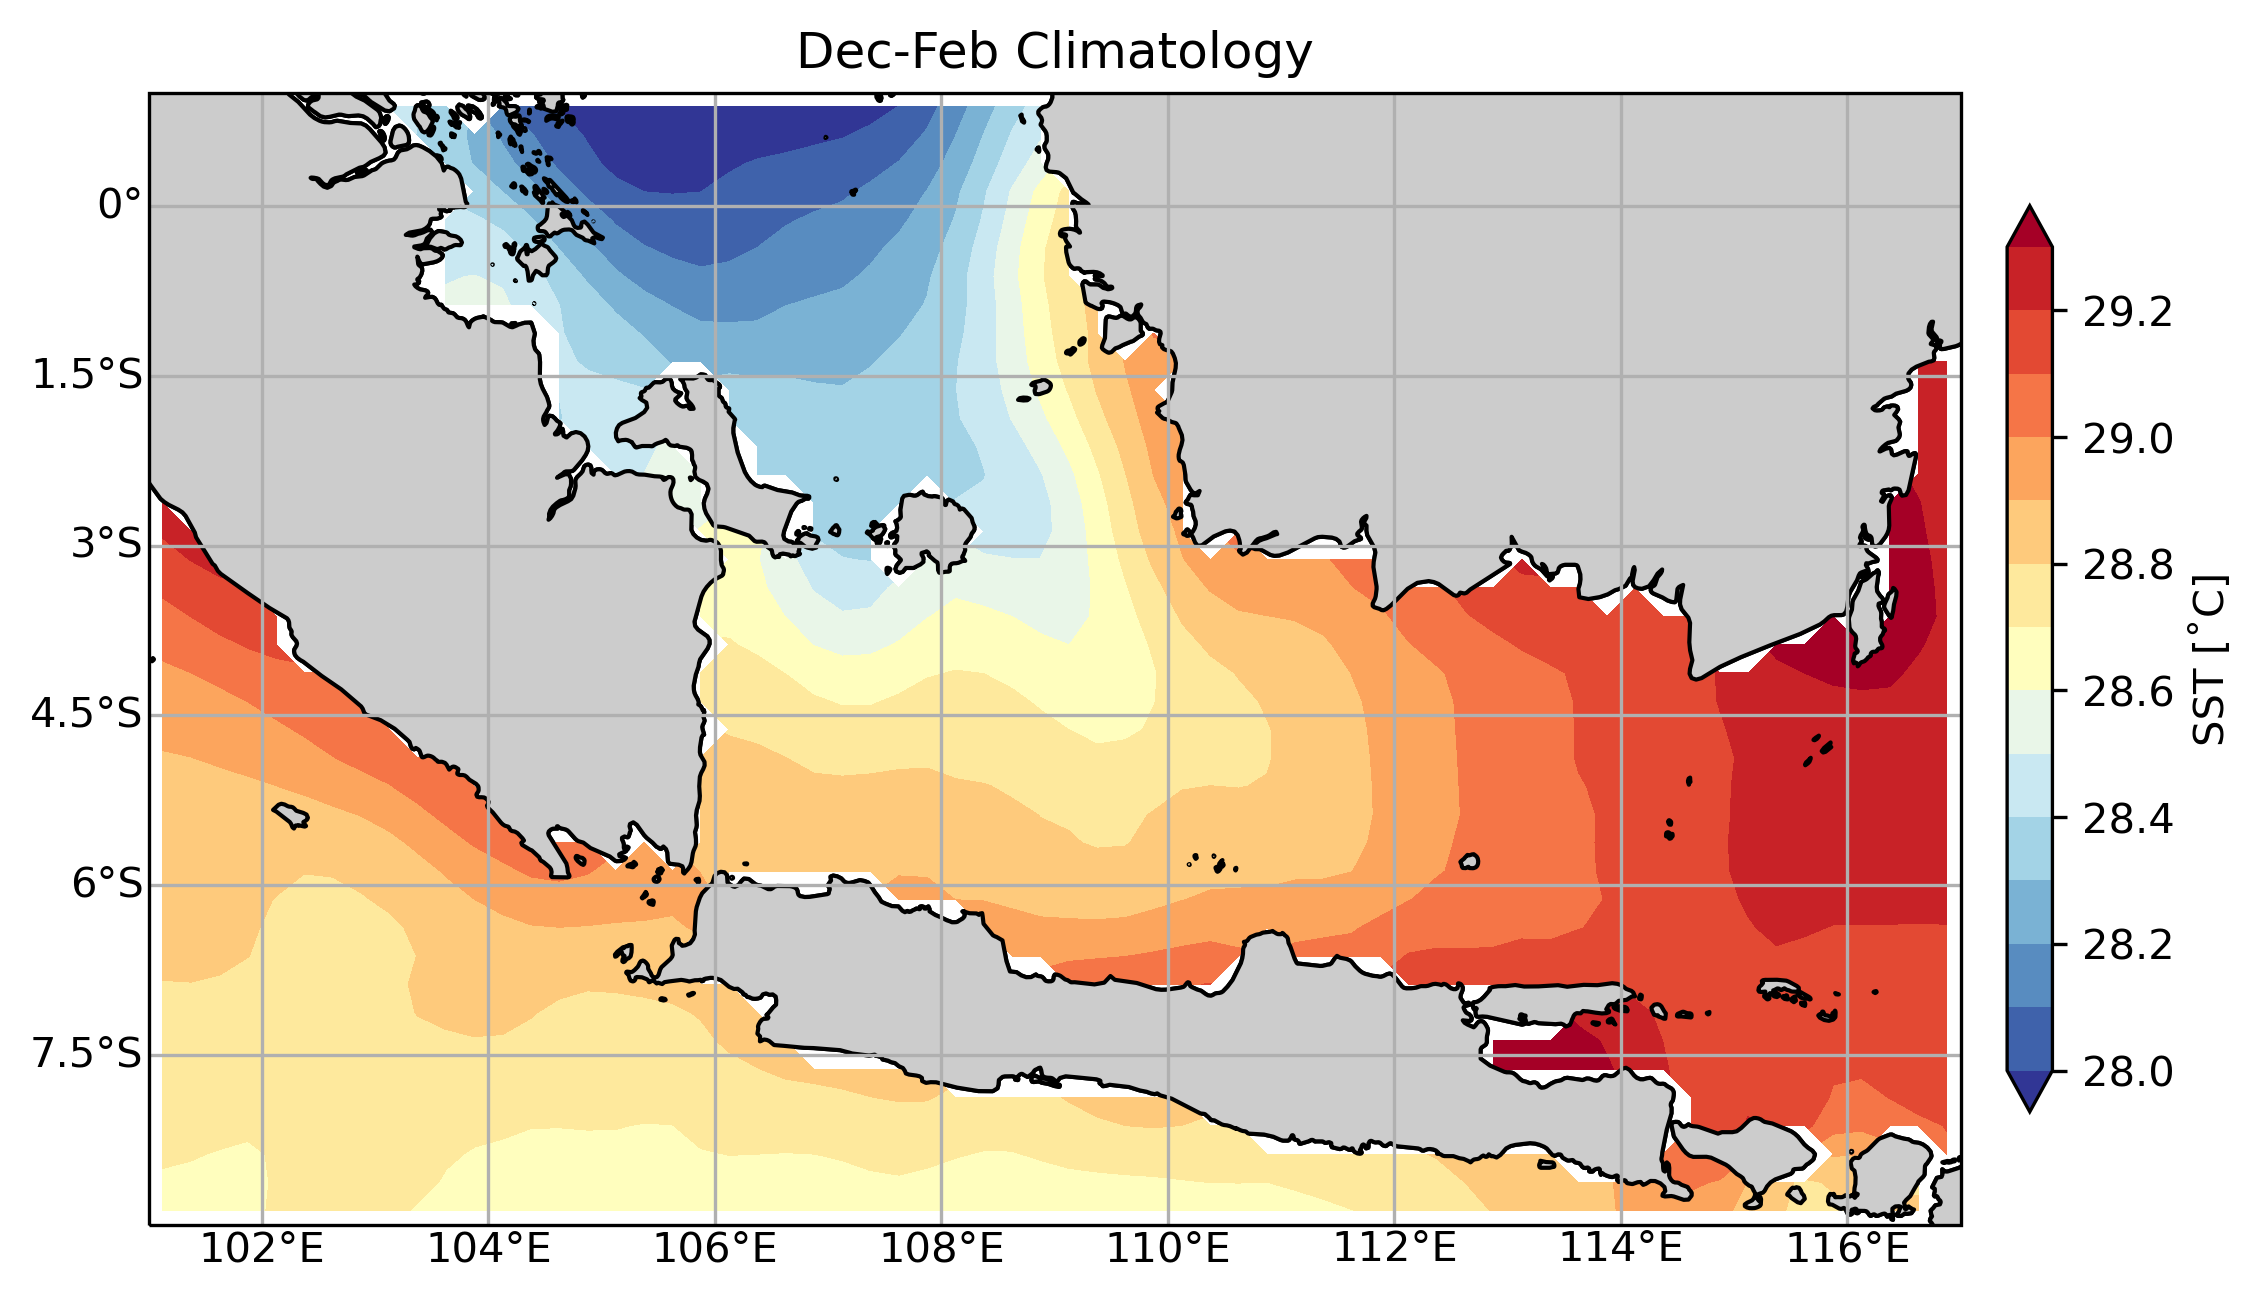

In [23]:
# Berikut untuk plotting dalam artikel
fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()}, dpi=300,
                      figsize=[10,5])

ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_labels=False
ax.add_feature(cfeature.LAND, facecolor='0.8', zorder=2, edgecolor='k')
region=[101,117,-9,1]
ax.set_extent(region)

season_sst.sel(season='DJF').plot.contourf(cmap='RdYlBu_r', 
                                           levels=np.arange(28,29.3,0.1), 
                                           extend='both',
                                           cbar_kwargs={'label':'SST [˚C]',
                                                       'shrink':0.8,
                                                       'pad':0.02})
ax.set_title('Dec-Feb Climatology')

# Exercise
Buat visualisasi yang sama, namun season diganti dengan bulan Maret April Mei

Text(0.5, 1.0, 'Mar-May Climatology')

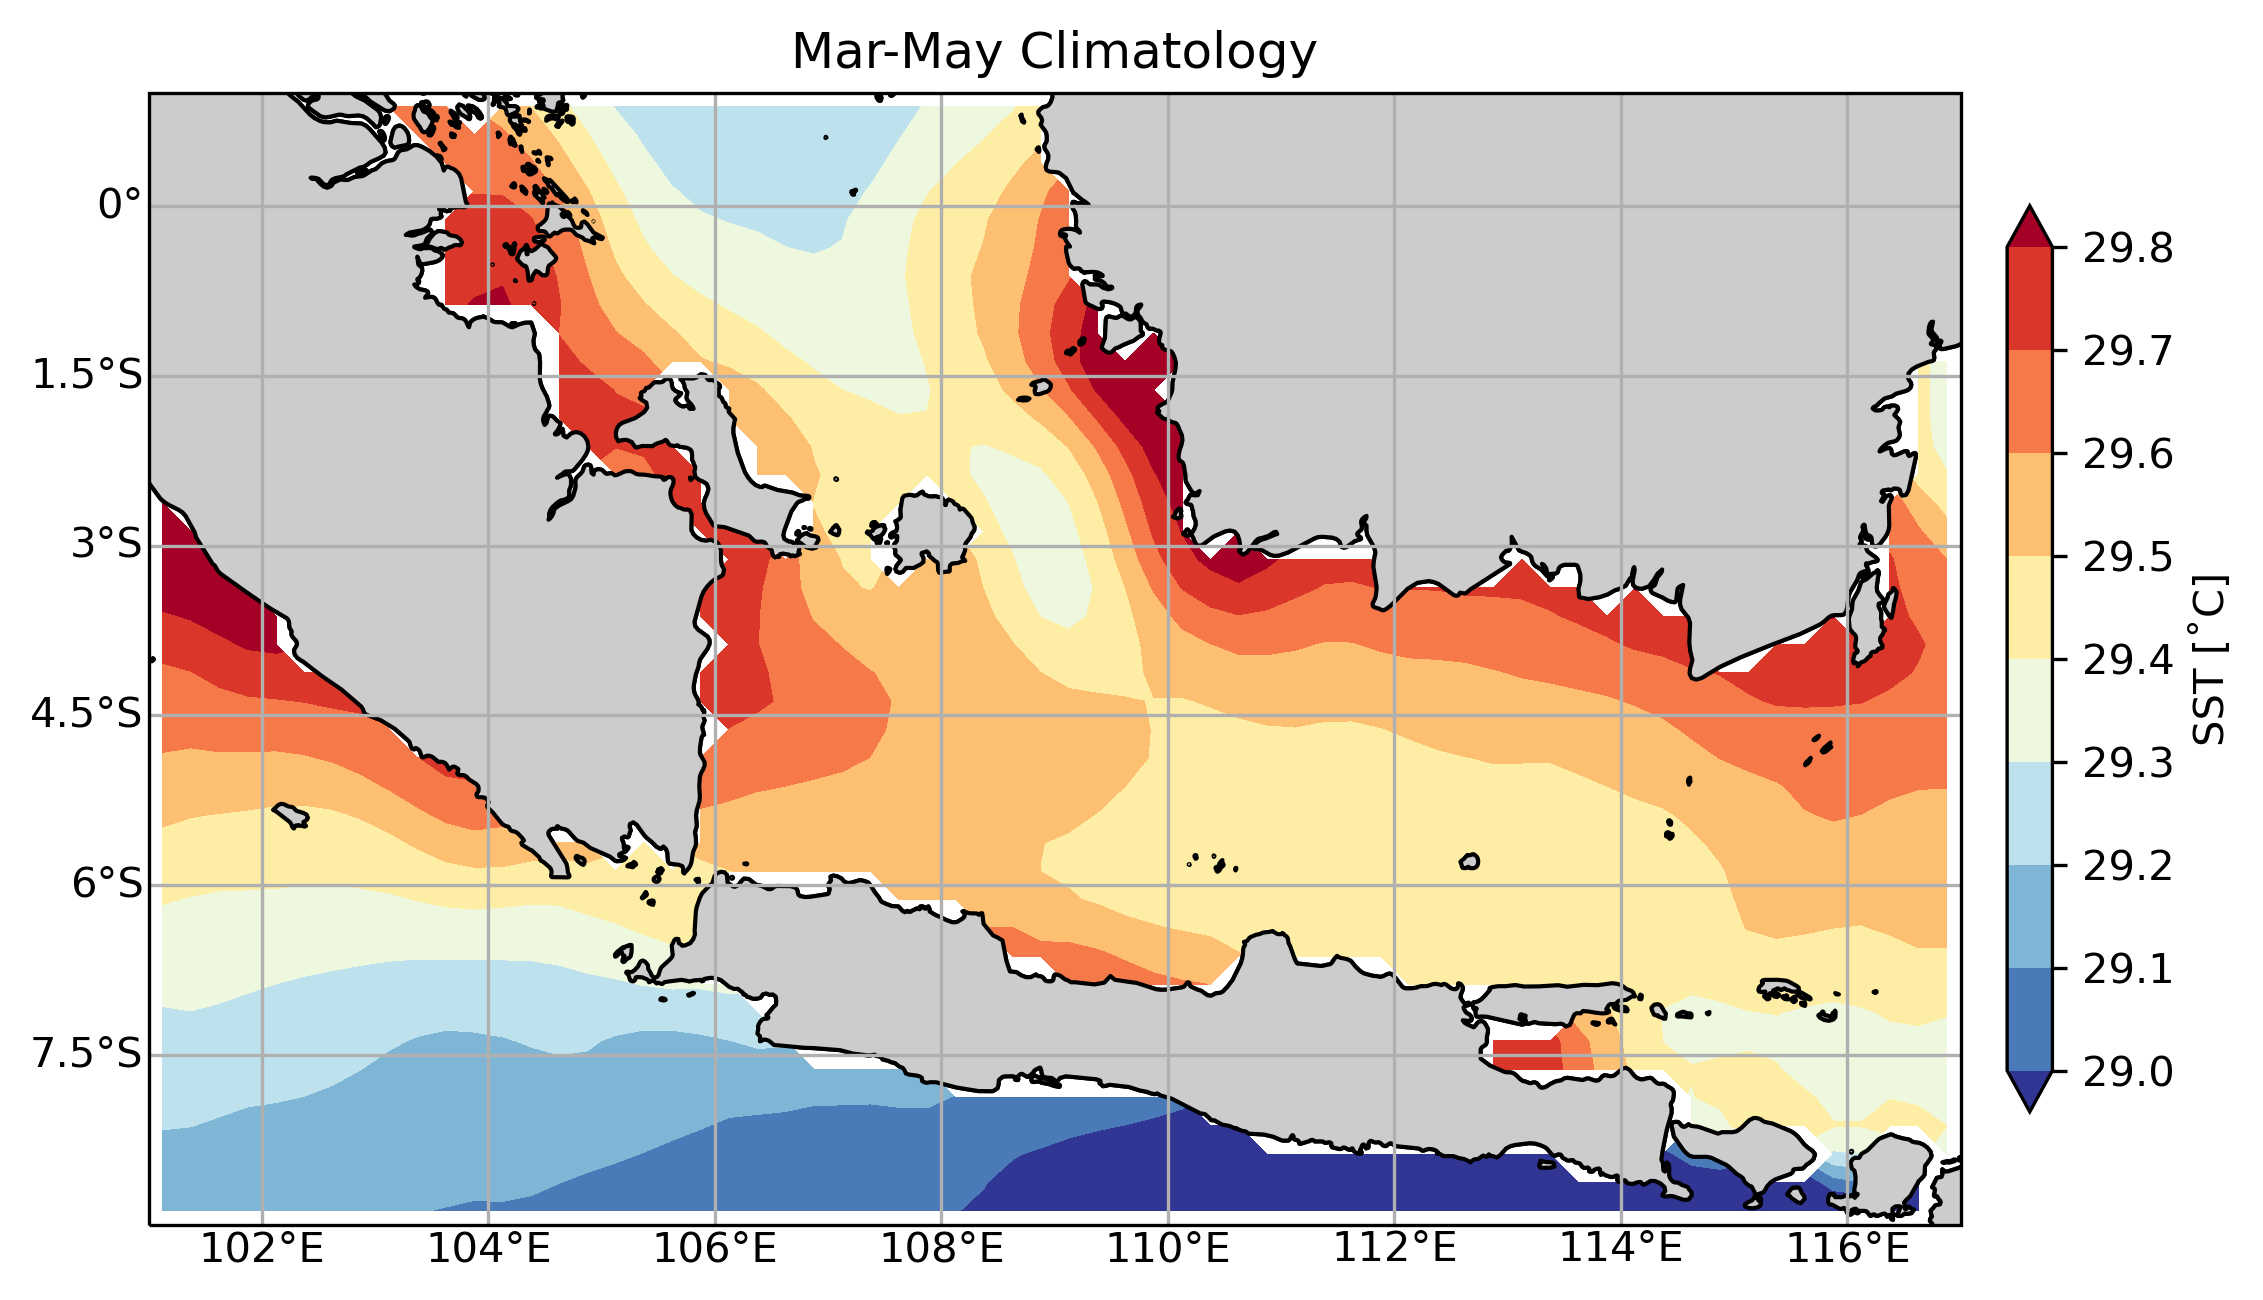

In [24]:
fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()}, dpi=300,
                      figsize=[10,5])

region=[101,117,-9,1]
ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.top_labels=False
gl.right_labels=False
ax.add_feature(cfeature.LAND, facecolor='0.8', zorder=2, edgecolor='k')
ax.set_extent(region)

season_sst.sel(season='MAM').plot.contourf(cmap='RdYlBu_r', 
                                           levels=np.arange(29,29.8,0.1), 
                                           extend='both',
                                           cbar_kwargs={'label':'SST [˚C]',
                                                       'shrink':0.8,
                                                       'pad':0.02})
ax.set_title('Mar-May Climatology')

Wall time: 485 ms


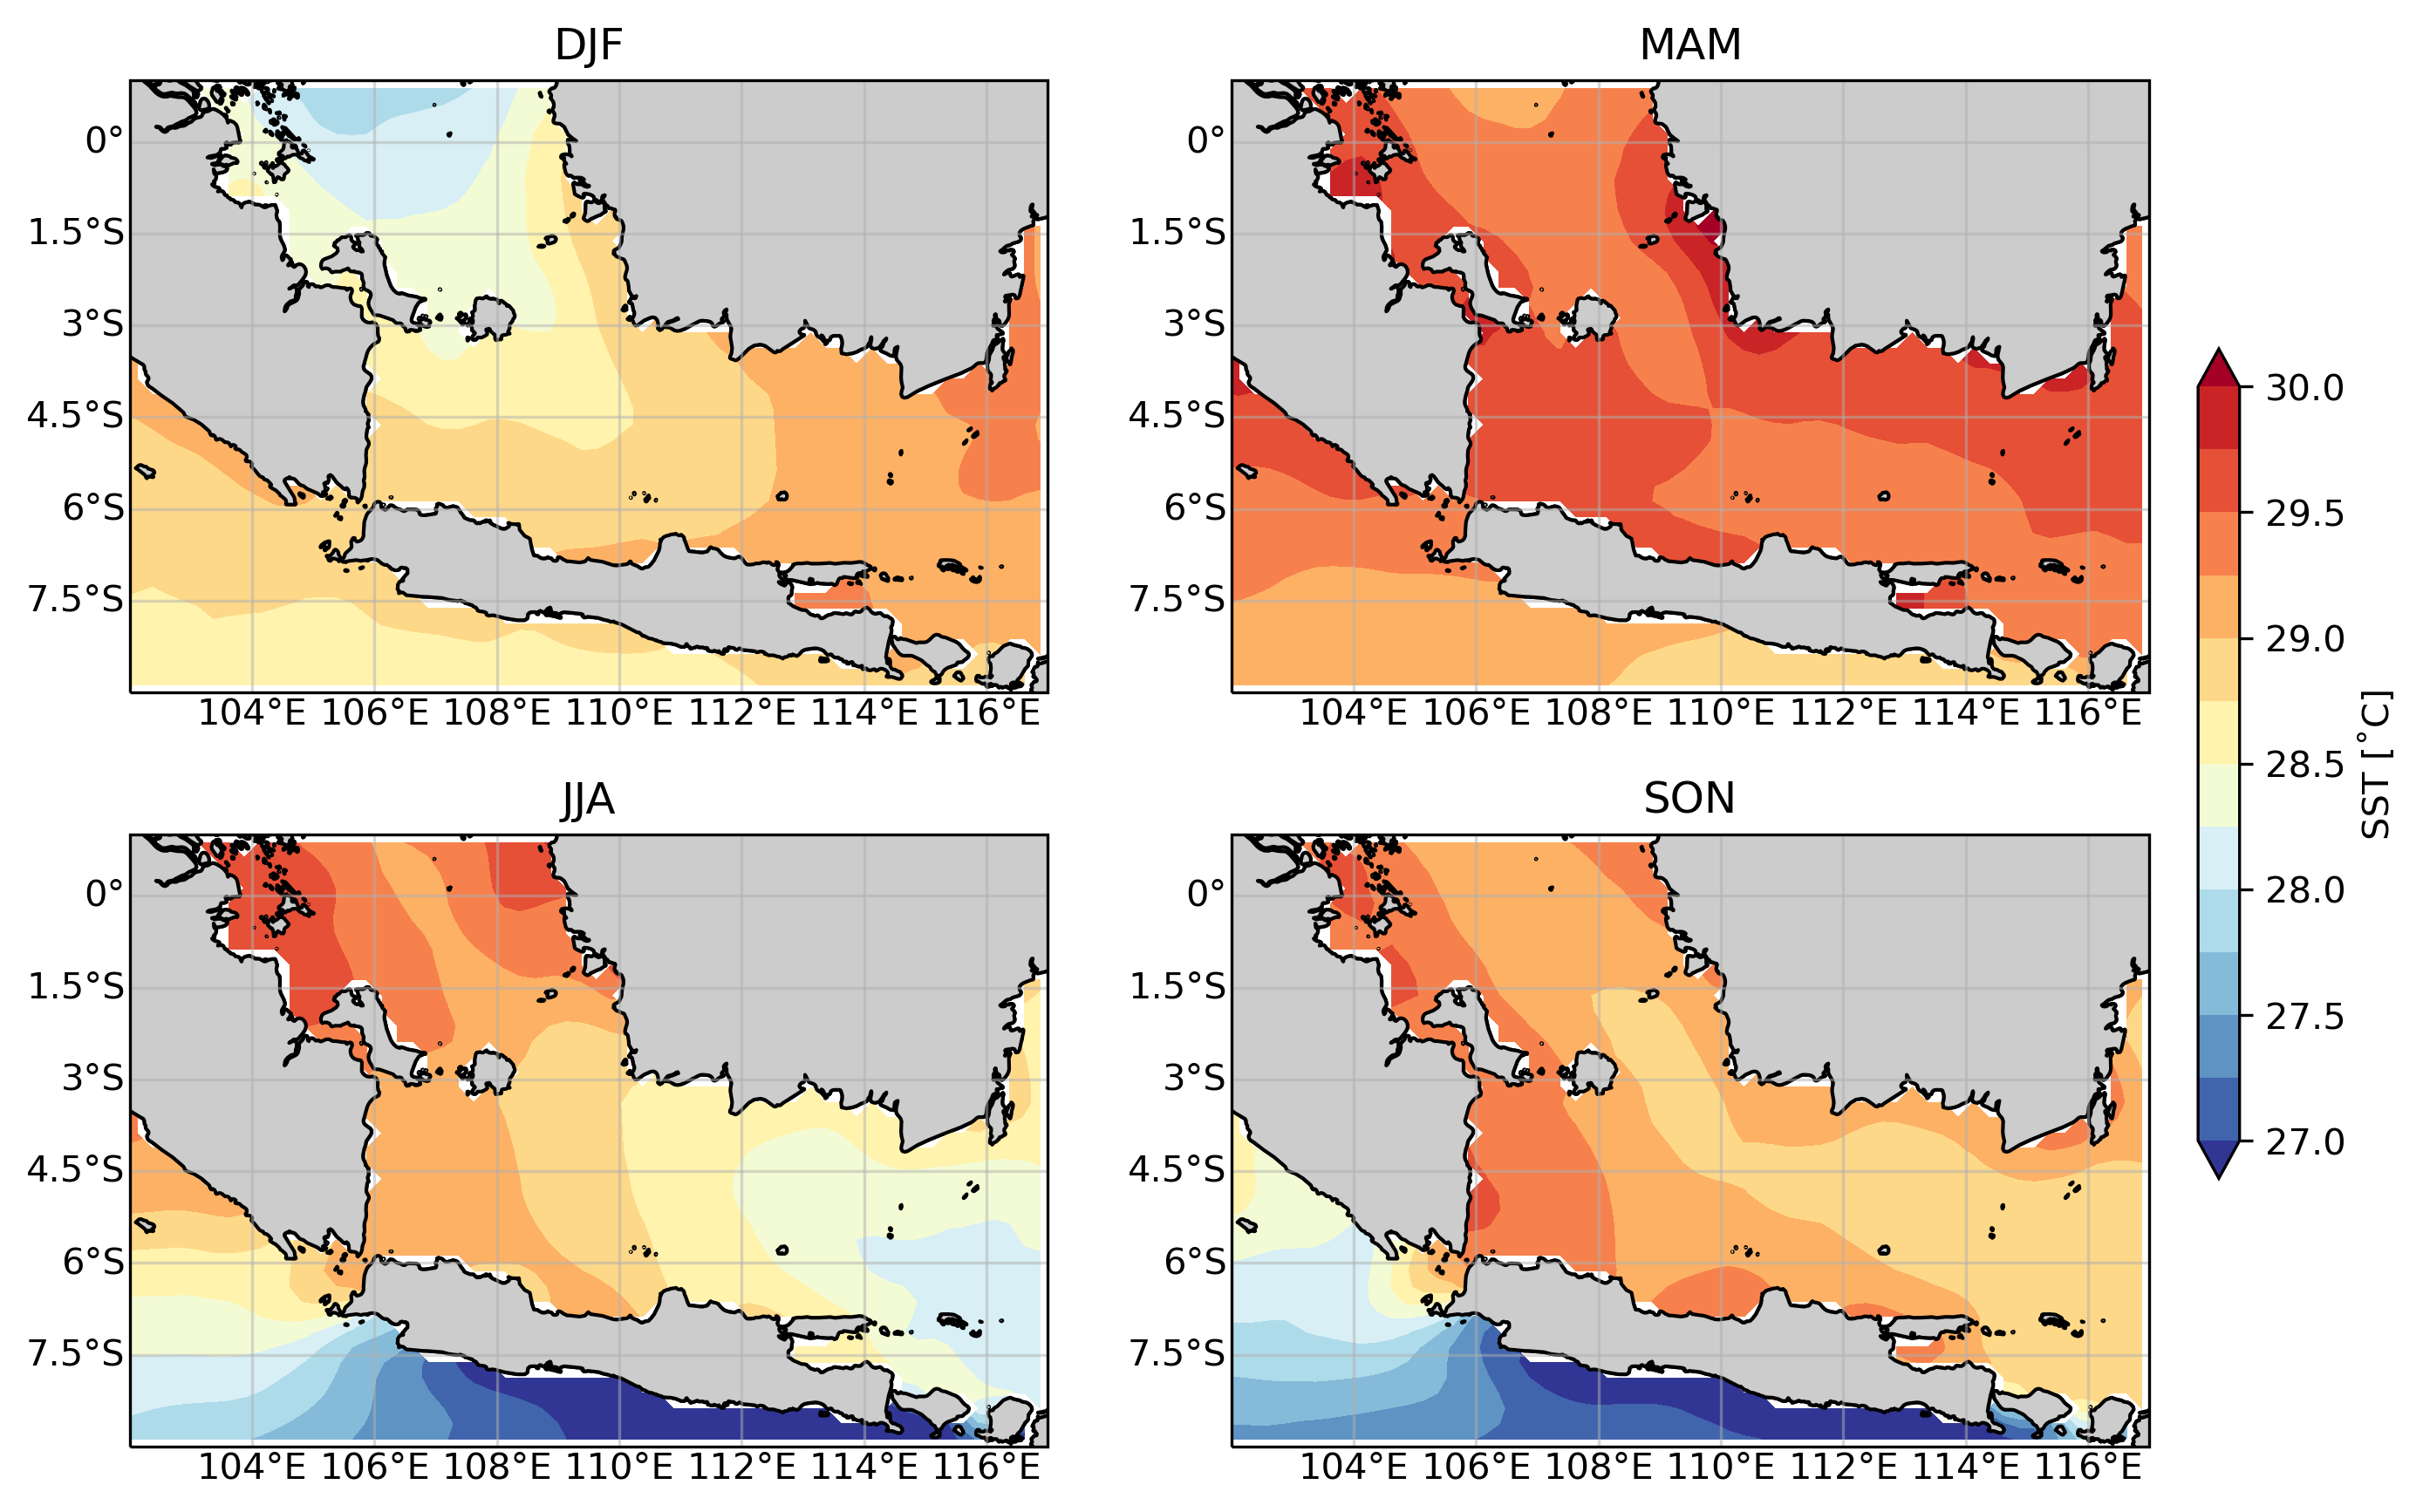

In [28]:
%%time

fig, axes = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree()},
                      ncols=2, nrows=2, dpi=300, figsize=[12,7])

axes_flatted = axes.flat
extent=[102,117,-9,1]
season_order = ['DJF', 'MAM', 'JJA', 'SON']

for i in range(len(season_sst.season)):
    axes_flatted[i].coastlines()
    axes_flatted[i].set_extent(extent)
    axes_flatted[i].add_feature(cfeature.LAND, facecolor='0.8', zorder=2, edgecolor='k')
    gl=axes_flatted[i].gridlines(draw_labels=True, alpha=0.5)
    gl.top_labels=False
    gl.right_labels=False
    
    im=season_sst.sel(season=season_order[i]).plot.contourf(ax=axes_flatted[i],
                                                   levels=np.arange(27,30.01,0.25), 
                                                   extend='both', add_colorbar=False,
                                                   cmap='RdYlBu_r')
    
    
    axes_flatted[i].set_title(season_order[i])

cbar =  fig.colorbar(im, ax=axes, extend='both', shrink=0.6, pad=0.02) 
cbar.set_label('SST [˚C]')

Gambar diatas merupakan visualisasi perbandingan SST dari 4 musim di Indonesia